# Pythonを使って、COVID-19のデータを可視化してみよう

## コンテンツ
- 使用するデータの確認
- データを使いやすくする
- いろんな図を作ってみる
- インタラクティブな図を作ってみる

## 使用するデータ

- [CSSEGISandData/COVID-19: Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)  
- 論文：[An interactive web-based dashboard to track COVID-19 in real time - The Lancet Infectious Diseases](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30120-1/fulltext)  
- view site：[Coronavirus COVID-19 (2019-nCoV)](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

[![Image from Gyazo](https://i.gyazo.com/d466d9b8474bb1c6722d79fa62cf23e9.png)](https://gyazo.com/d466d9b8474bb1c6722d79fa62cf23e9)

githubのレポジトリをclone

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

## データを見てみる

COVID-19/csse_covid_19_data/  
以下にあるデータを使用

- csse_covid_19_daily_reports
- csse_covid_19_time_series  

の2種類

### csse_covid_19_daily_reports

01-22-2020.csv~現在まで

[![Image from Gyazo](https://i.gyazo.com/04c09c97c93dc1b99cfc5541fb9b22b7.png)](https://gyazo.com/04c09c97c93dc1b99cfc5541fb9b22b7)

### csse_covid_19_time_series

使うデータは、  
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

### pandasを使って、csvファイルを見てみる

In [1]:
import pandas as pd

データの読み込み

In [ ]:
変数の名前 = pd.read_csv(読み込むファイルの居場所（パス）)

In [3]:
df_time_confirmed = \
pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

ファイルの先頭5行を見てみる

In [4]:
df_time_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  \
0        0        0        0  ...      170      174     237     273     281   
1        0        0        0  ...      223      243     259     277     304   
2        0        0        0  ...      584      716     847     986    1171   
3        0        0        0  ...      370      376     390     428     439   
4        0        0        0  ...        7        7       8       8       8   

   4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
0     299     349     367     423     444  
1     333     361     377     383     400  
2    1251    1320    1423    1468    1572  
3     466     501     525     545     564  
4      10      14      16      17      19  

[5 rows x 82 columns]

例えば、4/1/20のデータを見たいときは...

In [6]:
df_time_confirmed["4/1/20"].head()

0    237
1    259
2    847
3    390
4      8
Name: 4/1/20, dtype: int64

国名を見たいときは

In [7]:
df_time_confirmed["Country/Region"].head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

### 課題1

4/8/20のデータを表示させてみて下さい

confirmed, deaths, recoveredのファイルをそれぞれ読み込んでおく

In [9]:
df_time_confirmed = \
pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_time_deaths = \
pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_time_recovered = \
pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

## データを使いやすくする

In [10]:
df_time_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  \
0        0        0        0  ...      170      174     237     273     281   
1        0        0        0  ...      223      243     259     277     304   
2        0        0        0  ...      584      716     847     986    1171   
3        0        0        0  ...      370      376     390     428     439   
4        0        0        0  ...        7        7       8       8       8   

   4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
0     299     349     367     423     444  
1     333     361     377     383     400  
2    1251    1320    1423    1468    1572  
3     466     501     525     545     564  
4      10      14      16      17      19  

[5 rows x 82 columns]

カラム名を表示させる

In [11]:
df_time_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20'],
      dtype='object')

### いらないカラム（列）の削除

'Province/State', 'Lat', 'Long'を削除

In [12]:
df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long'])

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0              Afghanistan        0        0        0        0        0   
1                  Albania        0        0        0        0        0   
2                  Algeria        0        0        0        0        0   
3                  Andorra        0        0        0        0        0   
4                   Angola        0        0        0        0        0   
..                     ...      ...      ...      ...      ...      ...   
258         United Kingdom        0        0        0        0        0   
259                 France        0        0        0        0        0   
260            South Sudan        0        0        0        0        0   
261         Western Sahara        0        0        0        0        0   
262  Sao Tome and Principe        0        0        0        0        0   

     1/27/20  1/28/20  1/29/20  1/30/20  ...  3/30/20  3/31/20  4/1/20  \
0          0        0        0        0  ...      170      174     237   
1          0        0        0        0  ...      223      243     259   
2          0        0        0        0  ...      584      716     847   
3          0        0        0        0  ...      370      376     390   
4          0        0        0        0  ...        7        7       8   
..       ...      ...      ...      ...  ...      ...      ...     ...   
258        0        0        0        0  ...        0        0       0   
259        0        0        0        0  ...        0        0       0   
260        0        0        0        0  ...        0        0       0   
261        0        0        0        0  ...        0        0       0   
262        0        0        0        0  ...        0        0       0   

     4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  
0       273     281     299     349     367     423     444  
1       277     304     333     361     377     383     400  
2       986    1171    1251    1320    1423    1468    1572  
3       428     439     466     501     525     545     564  
4         8       8      10      14      16      17      19  
..      ...     ...     ...     ...     ...     ...     ...  
258       0       0       1       2       2       2       5  
259       0       0       0       1       1       1       1  
260       0       0       0       1       1       2       2  
261       0       0       0       4       4       4       4  
262       0       0       0       0       4       4       4  

[263 rows x 79 columns]

In [17]:
df_test = df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long'])

行の長さを数えてみる

In [13]:
len(df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long']))

263

Country/Regionごとにまとめる

[![Image from Gyazo](https://i.gyazo.com/3d3cc6ed1ef6ca9d326e386fa2d5f1e2.png)](https://gyazo.com/3d3cc6ed1ef6ca9d326e386fa2d5f1e2)

In [18]:
df_test.groupby('Country/Region').mean()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan             0.0      0.0      0.0      0.0      0.0      0.0   
Albania                 0.0      0.0      0.0      0.0      0.0      0.0   
Algeria                 0.0      0.0      0.0      0.0      0.0      0.0   
Andorra                 0.0      0.0      0.0      0.0      0.0      0.0   
Angola                  0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
Vietnam                 0.0      2.0      2.0      2.0      2.0      2.0   
West Bank and Gaza      0.0      0.0      0.0      0.0      0.0      0.0   
Western Sahara          0.0      0.0      0.0      0.0      0.0      0.0   
Zambia                  0.0      0.0      0.0      0.0      0.0      0.0   
Zimbabwe                0.0      0.0      0.0      0.0      0.0      0.0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  3/30/20  3/31/20  \
Country/Region                                          ...                     
Afghanistan             0.0      0.0      0.0      0.0  ...    170.0    174.0   
Albania                 0.0      0.0      0.0      0.0  ...    223.0    243.0   
Algeria                 0.0      0.0      0.0      0.0  ...    584.0    716.0   
Andorra                 0.0      0.0      0.0      0.0  ...    370.0    376.0   
Angola                  0.0      0.0      0.0      0.0  ...      7.0      7.0   
...                     ...      ...      ...      ...  ...      ...      ...   
Vietnam                 2.0      2.0      2.0      2.0  ...    203.0    212.0   
West Bank and Gaza      0.0      0.0      0.0      0.0  ...    116.0    119.0   
Western Sahara          0.0      0.0      0.0      0.0  ...      0.0      0.0   
Zambia                  0.0      0.0      0.0      0.0  ...     35.0     35.0   
Zimbabwe                0.0      0.0      0.0      0.0  ...      7.0      8.0   

                    4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
Country/Region                                                               
Afghanistan          237.0   273.0   281.0   299.0   349.0   367.0   423.0   
Albania              259.0   277.0   304.0   333.0   361.0   377.0   383.0   
Algeria              847.0   986.0  1171.0  1251.0  1320.0  1423.0  1468.0   
Andorra              390.0   428.0   439.0   466.0   501.0   525.0   545.0   
Angola                 8.0     8.0     8.0    10.0    14.0    16.0    17.0   
...                    ...     ...     ...     ...     ...     ...     ...   
Vietnam              218.0   233.0   237.0   240.0   241.0   245.0   249.0   
West Bank and Gaza   134.0   161.0   194.0   217.0   237.0   254.0   261.0   
Western Sahara         0.0     0.0     0.0     0.0     4.0     4.0     4.0   
Zambia                36.0    39.0    39.0    39.0    39.0    39.0    39.0   
Zimbabwe               8.0     9.0     9.0     9.0     9.0    10.0    11.0   

                    4/8/20  
Country/Region              
Afghanistan          444.0  
Albania              400.0  
Algeria             1572.0  
Andorra              564.0  
Angola                19.0  
...                    ...  
Vietnam              251.0  
West Bank and Gaza   263.0  
Western Sahara         4.0  
Zambia                39.0  
Zimbabwe              11.0  

[184 rows x 78 columns]

In [19]:
df_test_2 = df_test.groupby('Country/Region').mean()

In [15]:
# 行数
len(df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').mean())

184

### カラムとインデックスの反転

In [20]:
df_test_2.T

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
1/22/20                 0.0      0.0      0.0      0.0     0.0   
1/23/20                 0.0      0.0      0.0      0.0     0.0   
1/24/20                 0.0      0.0      0.0      0.0     0.0   
1/25/20                 0.0      0.0      0.0      0.0     0.0   
1/26/20                 0.0      0.0      0.0      0.0     0.0   
...                     ...      ...      ...      ...     ...   
4/4/20                299.0    333.0   1251.0    466.0    10.0   
4/5/20                349.0    361.0   1320.0    501.0    14.0   
4/6/20                367.0    377.0   1423.0    525.0    16.0   
4/7/20                423.0    383.0   1468.0    545.0    17.0   
4/8/20                444.0    400.0   1572.0    564.0    19.0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
1/22/20                         0.0        0.0      0.0      0.000      0.0   
1/23/20                         0.0        0.0      0.0      0.000      0.0   
1/24/20                         0.0        0.0      0.0      0.000      0.0   
1/25/20                         0.0        0.0      0.0      0.000      0.0   
1/26/20                         0.0        0.0      0.0      0.500      0.0   
...                             ...        ...      ...        ...      ...   
4/4/20                         15.0     1451.0    770.0    693.750  11781.0   
4/5/20                         15.0     1451.0    822.0    710.875  12051.0   
4/6/20                         15.0     1554.0    833.0    724.625  12297.0   
4/7/20                         19.0     1628.0    853.0    736.875  12639.0   
4/8/20                         19.0     1715.0    881.0    751.250  12942.0   

Country/Region  ...  United Arab Emirates  United Kingdom  Uruguay  \
1/22/20         ...                   0.0        0.000000      0.0   
1/23/20         ...                   0.0        0.000000      0.0   
1/24/20         ...                   0.0        0.000000      0.0   
1/25/20         ...                   0.0        0.000000      0.0   
1/26/20         ...                   0.0        0.000000      0.0   
...             ...                   ...             ...      ...   
4/4/20          ...                1505.0     3861.545455    400.0   
4/5/20          ...                1799.0     4403.272727    400.0   
4/6/20          ...                2076.0     4752.636364    406.0   
4/7/20          ...                2359.0     5086.272727    424.0   
4/8/20          ...                2659.0     5588.545455    424.0   

Country/Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  \
1/22/20                0.0        0.0      0.0                 0.0   
1/23/20                0.0        0.0      2.0                 0.0   
1/24/20                0.0        0.0      2.0                 0.0   
1/25/20                0.0        0.0      2.0                 0.0   
1/26/20                0.0        0.0      2.0                 0.0   
...                    ...        ...      ...                 ...   
4/4/20               266.0      155.0    240.0               217.0   
4/5/20               342.0      159.0    241.0               237.0   
4/6/20               457.0      165.0    245.0               254.0   
4/7/20               520.0      165.0    249.0               261.0   
4/8/20               545.0      167.0    251.0               263.0   

Country/Region  Western Sahara  Zambia  Zimbabwe  
1/22/20                    0.0     0.0       0.0  
1/23/20                    0.0     0.0       0.0  
1/24/20                    0.0     0.0       0.0  
1/25/20                    0.0     0.0       0.0  
1/26/20                    0.0     0.0       0.0  
...                        ...     ...       ...  
4/4/20                     0.0    39.0       9.0  
4/5/20                     4.0    39.0       9.0  
4/6/20                     4.0    39.0      10.0  
4/7/20                     4.0    39.0      11.0  
4/8/20         

まとめる

In [21]:
df_time_confirmed_sum = \
df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').mean().T

In [25]:
# 他の2つのdataframeも同じく
df_time_deaths_sum = \
df_time_deaths.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').mean().T
df_time_recovered_sum = \
df_time_recovered.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').mean().T

### 国名→国名コードに変換する

In [26]:
df_time_confirmed_sum.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Western Sahara',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=184)

地域と国のリスト

[List of countries by regional classification - Meta](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification)

In [27]:
df_region = pd.read_csv("country_region_list.csv")

In [28]:
df_region.head()

Country          Region  Global South
0     Afghanistan  Asia & Pacific  Global South
1   Aland Islands          Europe  Global North
2         Albania          Europe  Global North
3         Algeria     Arab States  Global South
4  American Samoa  Asia & Pacific  Global South

#### pycountryで変換

[flyingcircusio/pycountry: A Python library to access ISO country, subdivision, language, currency and script definitions and their translations.](https://github.com/flyingcircusio/pycountry)

In [29]:
import pycountry

In [30]:
pycountry.countries.get(name='Japan').alpha_3

'JPN'

In [31]:
pycountry.countries.get(name='Japan').alpha_2

'JP'

dataframeのカラム名ごとに、国コードに変換していく

In [32]:
# 空のリスト作成
list_country_code = []
list_country_ = []

# 国名を3文字コードに変換していく
for i in list(df_time_confirmed_sum.columns):
    try:
        list_country_code.append(pycountry.countries.get(name=i).alpha_3)
        list_country_.append(i)
    except:
        print(i)

Bolivia
Brunei
Burma
Congo (Brazzaville)
Congo (Kinshasa)
Cote d'Ivoire
Diamond Princess
Holy See
Iran
Korea, South
Kosovo
Laos
MS Zaandam
Moldova
Russia
Syria
Taiwan*
Tanzania
US
Venezuela
Vietnam
West Bank and Gaza


↑ printされたものが、自動では変換されなかったもの

リストに入っている国名だけで辞書を作成

In [33]:
dict(zip(list_country_, list_country_code))

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Costa Rica': 'CRI',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Cyprus': 'CYP',
 'Czechia': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominica': 'DMA',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Erit

In [34]:
dict_country_code = dict(zip(list_country_, list_country_code))

In [35]:
len(dict_country_code)

162

手動で変換

参考：[国名コード](http://www.kc.tsukuba.ac.jp/ulismeta/metadata/standard/cntry_code.html)

In [ ]:
"Bolivia": "BOL",
"Brunei": "BRN",
"Burma": "MMR",
"Congo (Brazzaville)": "COG",
"Congo (Kinshasa)": "COG",
"Cote d'Ivoire": "CIV",
"Holy See": "VAT",
"Iran": "IRN",
"Korea, South": "PRK",
"Laos": "LAO",
"Moldova": "MDA",
"Russia": "RUS",
"Syria": "SYR",
"Taiwan*": "TWN",
"Tanzania": "TZA",
"US": "USA",
"Venezuela": "VEN",
"Vietnam": "VNM",

除外するカラム

In [ ]:
"Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"

In [36]:
df_time_confirmed_sum = df_time_confirmed_sum.drop(columns=["Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"])
df_time_deaths_sum = df_time_deaths_sum.drop(columns=["Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"])
df_time_recovered_sum = df_time_recovered_sum.drop(columns=["Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"])

手動で変換した分を辞書に追加

In [37]:
dict_country_code.update(
{"Bolivia": "BOL",
"Brunei": "BRN",
"Burma": "MMR",
"Congo (Brazzaville)": "COG",
"Congo (Kinshasa)": "COG",
"Cote d'Ivoire": "CIV",
"Holy See": "VAT",
"Iran": "IRN",
"Korea, South": "PRK",
"Laos": "LAO",
"Moldova": "MDA",
"Russia": "RUS",
"Syria": "SYR",
"Taiwan*": "TWN",
"Tanzania": "TZA",
"US": "USA",
"Venezuela": "VEN",
"Vietnam": "VNM"}
)

In [38]:
len(dict_country_code)

180

#### dataframeのカラム名をコードに変換する

In [40]:
# 辞書を元に、カラム名の国名を変換
list_country_code_columns = []
for i in list(df_time_confirmed_sum.columns):
    list_country_code_columns.append(dict_country_code[i])

In [41]:
df_time_confirmed_sum.columns = list_country_code_columns

In [42]:
df_time_deaths_sum.columns = list_country_code_columns
df_time_recovered_sum.columns = list_country_code_columns

In [43]:
df_time_confirmed_sum.head()

AFG  ALB  DZA  AND  AGO  ATG  ARG  ARM  AUS  AUT  ...  UKR  ARE  GBR  \
1/22/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/23/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/24/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/25/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/26/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  ...  0.0  0.0  0.0   

         URY  UZB  VEN  VNM  ESH  ZMB  ZWE  
1/22/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1/23/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
1/24/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
1/25/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
1/26/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  

[5 rows x 180 columns]

dataframe全体を整数に

In [44]:
df_time_confirmed_sum = df_time_confirmed_sum.round()
df_time_deaths_sum = df_time_deaths_sum.round()
df_time_recovered_sum = df_time_recovered_sum.round()

## いろんなplotを作ってみる

dataframeから最大値を見つける

In [45]:
df_time_confirmed_sum.max()

AFG     444.0
ALB     400.0
DZA    1572.0
AND     564.0
AGO      19.0
        ...  
VEN     167.0
VNM     251.0
ESH       4.0
ZMB      39.0
ZWE      11.0
Length: 180, dtype: float64

In [46]:
df_time_confirmed_sum.max().sort_values(ascending=False)

USA    429052.0
ESP    148220.0
ITA    139422.0
DEU    113296.0
IRN     64586.0
         ...   
STP         4.0
BDI         3.0
SSD         2.0
PNG         2.0
TLS         1.0
Length: 180, dtype: float64

### 国ごとの、時間に沿った確認患者数の折れ線グラフ

country以下を好きな国に変更

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

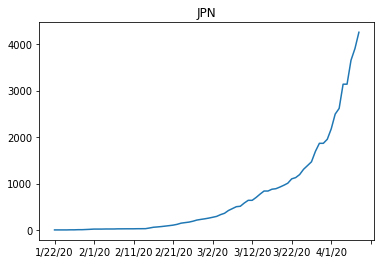

In [113]:
country = "JPN"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.savefig('fig/plot_japan_no_yaxis.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

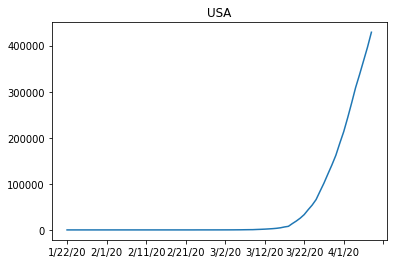

In [114]:
country = "USA"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.savefig('fig/plot_usa_no_yaxis.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

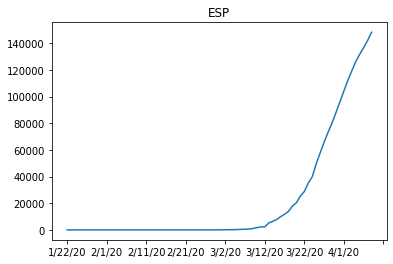

In [115]:
country = "ESP"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.savefig('fig/plot_spain_no_yaxis.pdf')

y軸の範囲をそろえる

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

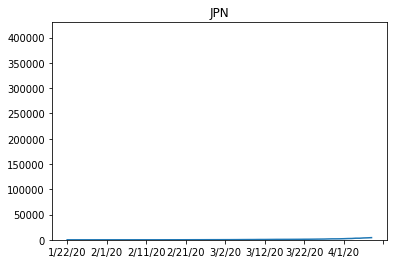

In [116]:
country = "JPN"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, 430000])
plt.savefig('fig/plot_japan.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

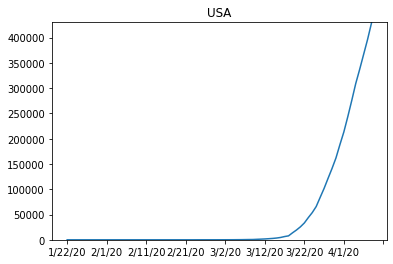

In [117]:
country = "USA"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, 430000])
plt.savefig('fig/plot_usa.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

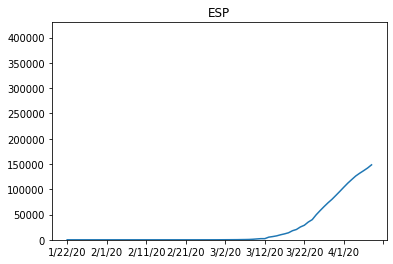

In [118]:
country = "ESP"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, 430000])
plt.savefig('fig/plot_spain.pdf')

### 課題2

1. 好きな国を選んで、折れ線図を表示させてみてください

参考：[国名コード](http://www.kc.tsukuba.ac.jp/ulismeta/metadata/standard/cntry_code.html)  
国名コードはこちらで調べられます

2. 死者数、回復した患者数でも同様の図を作ってみてください

### 感染者数を多い順に並べる

10ヶ国だけ見てみる

In [56]:
df_time_confirmed_sum.max().sort_values(ascending=False)[0:10]

USA    429052.0
ESP    148220.0
ITA    139422.0
DEU    113296.0
IRN     64586.0
TUR     38226.0
BEL     23403.0
CHE     23280.0
BRA     16170.0
PRT     13141.0
dtype: float64

top10ヶ国だけのdataframeを抜き出す

In [57]:
list_top10_country = list(df_time_confirmed_sum.max().sort_values(ascending=False)[0:10].index)
df_time_confirmed_sum[list_top10_country]

USA       ESP       ITA       DEU      IRN      TUR      BEL  \
1/22/20       1.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/23/20       1.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/24/20       2.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/25/20       2.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/26/20       5.0       0.0       0.0       0.0      0.0      0.0      0.0   
...           ...       ...       ...       ...      ...      ...      ...   
4/4/20   308850.0  126168.0  124632.0   96092.0  55743.0  23934.0  18431.0   
4/5/20   337072.0  131646.0  128948.0  100123.0  58226.0  27069.0  19691.0   
4/6/20   366667.0  136675.0  132547.0  103374.0  60500.0  30217.0  20814.0   
4/7/20   396223.0  141942.0  135586.0  107663.0  62589.0  34109.0  22194.0   
4/8/20   429052.0  148220.0  139422.0  113296.0  64586.0  38226.0  23403.0   

             CHE      BRA      PRT  
1/22/20      0.0      0.0      0.0  
1/23/20      0.0      0.0      0.0  
1/24/20      0.0      0.0      0.0  
1/25/20      0.0      0.0      0.0  
1/26/20      0.0      0.0      0.0  
...          ...      ...      ...  
4/4/20   20505.0  10360.0  10524.0  
4/5/20   21100.0  11130.0  11278.0  
4/6/20   21657.0  12161.0  11730.0  
4/7/20   22253.0  14034.0  12442.0  
4/8/20   23280.0  16170.0  13141.0  

[78 rows x 10 columns]

折れ線図

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

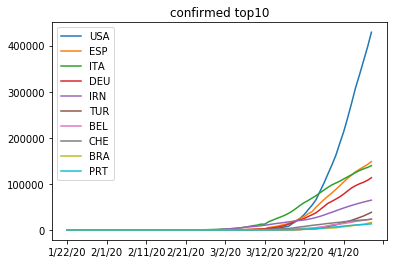

In [119]:
df_time_confirmed_sum[list_top10_country].plot()
plt.title("confirmed top10")
plt.savefig('fig/plot_top10_confirmed.pdf')

### 現在の感染者確認数のtop10を棒グラフで見てみる

dataframeの最終行を表示

In [62]:
df_time_confirmed_sum[list_top10_country][-1:]

USA       ESP       ITA       DEU      IRN      TUR      BEL  \
4/8/20  429052.0  148220.0  139422.0  113296.0  64586.0  38226.0  23403.0   

            CHE      BRA      PRT  
4/8/20  23280.0  16170.0  13141.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

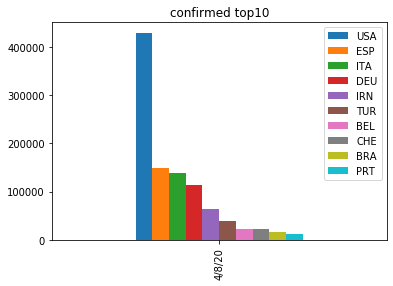

In [120]:
df_time_confirmed_sum[list_top10_country][-1:].plot.bar()
plt.title("confirmed top10")
plt.savefig('fig/bar_top10_confirmed.pdf')

## インタラクティブな図を作成

### pandas-bokeh

[PatrikHlobil/Pandas-Bokeh: Bokeh Plotting Backend for Pandas and GeoPandas](https://github.com/PatrikHlobil/Pandas-Bokeh)

In [66]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [67]:
df_time_confirmed_sum.head()

AFG  ALB  DZA  AND  AGO  ATG  ARG  ARM  AUS  AUT  ...  UKR  ARE  GBR  \
1/22/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/23/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/24/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/25/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1/26/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         URY  UZB  VEN  VNM  ESH  ZMB  ZWE  
1/22/20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1/23/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
1/24/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
1/25/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  
1/26/20  0.0  0.0  0.0  2.0  0.0  0.0  0.0  

[5 rows x 180 columns]

In [68]:
df_time_confirmed_sum[list_top10_country]

USA       ESP       ITA       DEU      IRN      TUR      BEL  \
1/22/20       1.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/23/20       1.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/24/20       2.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/25/20       2.0       0.0       0.0       0.0      0.0      0.0      0.0   
1/26/20       5.0       0.0       0.0       0.0      0.0      0.0      0.0   
...           ...       ...       ...       ...      ...      ...      ...   
4/4/20   308850.0  126168.0  124632.0   96092.0  55743.0  23934.0  18431.0   
4/5/20   337072.0  131646.0  128948.0  100123.0  58226.0  27069.0  19691.0   
4/6/20   366667.0  136675.0  132547.0  103374.0  60500.0  30217.0  20814.0   
4/7/20   396223.0  141942.0  135586.0  107663.0  62589.0  34109.0  22194.0   
4/8/20   429052.0  148220.0  139422.0  113296.0  64586.0  38226.0  23403.0   

             CHE      BRA      PRT  
1/22/20      0.0      0.0      0.0  
1/23/20      0.0      0.0      0.0  
1/24/20      0.0      0.0      0.0  
1/25/20      0.0      0.0      0.0  
1/26/20      0.0      0.0      0.0  
...          ...      ...      ...  
4/4/20   20505.0  10360.0  10524.0  
4/5/20   21100.0  11130.0  11278.0  
4/6/20   21657.0  12161.0  11730.0  
4/7/20   22253.0  14034.0  12442.0  
4/8/20   23280.0  16170.0  13141.0  

[78 rows x 10 columns]

#### 折れ線図をplot

JPNとUSAを比較

In [75]:
df_time_confirmed_sum[["JPN", "USA"]].plot_bokeh.line()

Figure(id='2203', ...)

In [122]:
#保存しておく
import pandas_bokeh
df_time_confirmed_sum[["JPN", "USA"]].plot_bokeh.line()
pandas_bokeh.output_file("fig/interactive/bokeh_line_jpn_usa.html")

In [76]:
df_time_confirmed_sum[["USA", "ESP"]].plot_bokeh.line()

Figure(id='2373', ...)

In [123]:
#保存しておく
import pandas_bokeh
df_time_confirmed_sum[["USA", "ESP"]].plot_bokeh.line()
pandas_bokeh.output_file("fig/interactive/bokeh_line_esp_usa.html")

top10ヶ国で

In [69]:
df_time_confirmed_sum[list_top10_country].plot_bokeh.line()

Figure(id='1002', ...)

In [124]:
import pandas_bokeh
df_time_confirmed_sum[list_top10_country].plot_bokeh.line()
pandas_bokeh.output_file("fig/interactive/bokeh_line_top10.html")

棒グラフ

In [72]:
df_time_confirmed_sum[list_top10_country][-1:].plot_bokeh.bar()

Figure(id='1774', ...)

In [125]:
import pandas_bokeh
df_time_confirmed_sum[list_top10_country][-1:].plot_bokeh.bar()
pandas_bokeh.output_file("fig/interactive/bokeh_bar_top10.html")

### 課題3

2ヶ国を選んで、Bokehでインタラクティブな折れ線図を描いてみよう

### コロプレス図を作成

### Lightning

[lightning-viz/lightning: Data Visualization Server](https://github.com/lightning-viz/lightning)


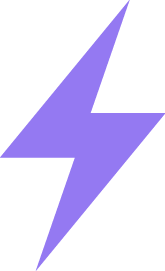

Running local mode, some functionality limited.



In [77]:
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

[lightning.Lightning.map — Lightning 1.1.1 documentation](http://lightning-viz.org/lightning-python/generated/lightning.Lightning.map.html)

例

In [78]:
countries = ['USA', 'CHN', 'JPN', 'DEU', 'GBR',
             'FRA', 'IND', 'ITA', 'BRA', 'CAN']

values = (np.random.rand(len(countries)) * 5).astype('int')
lgn.map(countries, values)

df_time_confirmed_sumのデータで

In [79]:
df_time_confirmed_sum[-1:]

AFG    ALB     DZA    AND   AGO   ATG     ARG    ARM    AUS  \
4/8/20  444.0  400.0  1572.0  564.0  19.0  19.0  1715.0  881.0  751.0   

            AUT  ...     UKR     ARE     GBR    URY    UZB    VEN    VNM  ESH  \
4/8/20  12942.0  ...  1668.0  2659.0  5589.0  424.0  545.0  167.0  251.0  4.0   

         ZMB   ZWE  
4/8/20  39.0  11.0  

[1 rows x 180 columns]

値だけを取り出す

In [81]:
df_time_confirmed_sum[-1:].values[0]

array([4.44000e+02, 4.00000e+02, 1.57200e+03, 5.64000e+02, 1.90000e+01,
       1.90000e+01, 1.71500e+03, 8.81000e+02, 7.51000e+02, 1.29420e+04,
       8.22000e+02, 4.00000e+01, 8.23000e+02, 2.18000e+02, 6.30000e+01,
       1.06600e+03, 2.34030e+04, 8.00000e+00, 2.60000e+01, 5.00000e+00,
       2.10000e+02, 8.04000e+02, 6.00000e+00, 1.61700e+04, 1.35000e+02,
       5.93000e+02, 4.14000e+02, 2.20000e+01, 3.00000e+00, 7.00000e+00,
       1.17000e+02, 7.30000e+02, 1.27600e+03, 8.00000e+00, 1.00000e+01,
       5.54600e+03, 2.50900e+03, 2.05400e+03, 4.50000e+01, 1.80000e+02,
       5.02000e+02, 3.84000e+02, 1.34300e+03, 4.57000e+02, 5.26000e+02,
       5.31200e+03, 1.86600e+03, 1.35000e+02, 1.50000e+01, 2.11100e+03,
       4.45000e+03, 1.56000e+03, 9.30000e+01, 1.80000e+01, 3.30000e+01,
       1.18500e+03, 1.20000e+01, 5.50000e+01, 1.50000e+01, 2.48700e+03,
       1.03600e+04, 3.40000e+01, 4.00000e+00, 2.11000e+02, 1.13296e+05,
       3.13000e+02, 1.88400e+03, 1.20000e+01, 8.70000e+01, 1.640

In [80]:
# lgn.map(countries, values)
lgn.map(list(df_time_confirmed_sum.columns), df_time_confirmed_sum[-1:].values[0])

カラーを変更する

In [82]:
# lgn.map(countries, values)
lgn.map(
    list(df_time_confirmed_sum.columns), 
    df_time_confirmed_sum[-1:].values[0].astype('int'), 
    colormap="Spectral")

In [83]:
# lgn.map(countries, values)
lgn.map(
    list(df_time_confirmed_sum.columns), 
    df_time_confirmed_sum[-1:].values[0].astype('int'), 
    colormap="Lightning")

### Folium

In [84]:
import folium

Jupyter内部で描画

In [85]:
from IPython.display import HTML

def inline_map(m):
    # 中間生成される json が必要なプロットがあるため、一度 html として書き出し
    m.create_map(path='tmp.html')
    iframe = '<iframe srcdoc=\"{srcdoc}\" style=\"width: 100%; height: 400px; border: none\"></iframe>'
    return HTML(iframe.format(srcdoc=m.HTML.replace('\"', '&quot;')))

必要なデータ
- GeoJSON もしくは TopoJSON 形式のファイル
- コロプレス図を色分けするための値を含む pandas の DataFrame

geojsonデータ→[johan/world.geo.json: Annotated geo-json geometry files for the world](https://github.com/johan/world.geo.json)

./world.geo.json-master/countries.geo.json

まずは地図をplotしてみる

In [127]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)

m.save(outfile="fig/folium/map.html")

In [86]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)

m

foliumでplotできるように、dataframeを調整する

現在のデータ

In [87]:
df_time_confirmed_sum[-1:].T

4/8/20
AFG   444.0
ALB   400.0
DZA  1572.0
AND   564.0
AGO    19.0
..      ...
VEN   167.0
VNM   251.0
ESH     4.0
ZMB    39.0
ZWE    11.0

[180 rows x 1 columns]

In [89]:
df_latest = df_time_confirmed_sum[-1:].T.reset_index()
df_latest.columns = ["country", "number"]
df_latest.head()

country  number
0     AFG   444.0
1     ALB   400.0
2     DZA  1572.0
3     AND   564.0
4     AGO    19.0

In [92]:
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlGnBu', reset=True)

In [128]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlGnBu', reset=True)

m.save(outfile="fig/folium/latest_YlGnBu.html")

/Users/yamada/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [93]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlGnBu', reset=True)

m

カラーの変更

[python foliumのコロプレス図で選択可能なfill_color について | Monotalk](https://www.monotalk.xyz/blog/python-folium%E3%81%AE%E3%82%B3%E3%83%AD%E3%83%97%E3%83%AC%E3%82%B9%E5%9B%B3%E3%81%A7%E9%81%B8%E6%8A%9E%E5%8F%AF%E8%83%BD%E3%81%AAfill_color-%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6/)

In [96]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='PRGn', reset=True)

m

In [129]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m.save(outfile="fig/folium/latest_YlOrRd.html")

In [94]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m

#### マーカーを追加してみる

In [97]:
list_top10_country

['USA', 'ESP', 'ITA', 'DEU', 'IRN', 'TUR', 'BEL', 'CHE', 'BRA', 'PRT']

#### 各国の首都の緯度経度をdataframeで扱う

In [98]:
df_capital = pd.read_csv("capital_geo_list.csv")
df_capital.head()

Country Name Capital Name  Capital Latitude  Capital Longitude  \
0     Afghanistan        Kabul         34.516667          69.183333   
1   Aland Islands    Mariehamn         60.116667          19.900000   
2         Albania       Tirana         41.316667          19.816667   
3         Algeria      Algiers         36.750000           3.050000   
4  American Samoa    Pago Pago        -14.266667        -170.700000   

  Country Code Continent Name  
0           AF           Asia  
1           AX         Europe  
2           AL         Europe  
3           DZ         Africa  
4           AS      Australia

Country Codeの2文字コードをpycountryで3文字コードに変換する

In [99]:
list_country_code_capital = []
for i in list(df_capital["Country Code"]):
    try:
        list_country_code_capital.append(pycountry.countries.get(alpha_2=i).alpha_3)
        # print(pycountry.countries.get(alpha_2=i).alpha_3)
    except:
        print(i)
        list_country_code_capital.append(i)

KO
nan
nan
nan


df_capitalにカラムを追加

In [100]:
df_capital["code3"] = list_country_code_capital
df_capital.head()

Country Name Capital Name  Capital Latitude  Capital Longitude  \
0     Afghanistan        Kabul         34.516667          69.183333   
1   Aland Islands    Mariehamn         60.116667          19.900000   
2         Albania       Tirana         41.316667          19.816667   
3         Algeria      Algiers         36.750000           3.050000   
4  American Samoa    Pago Pago        -14.266667        -170.700000   

  Country Code Continent Name code3  
0           AF           Asia   AFG  
1           AX         Europe   ALA  
2           AL         Europe   ALB  
3           DZ         Africa   DZA  
4           AS      Australia   ASM

df_capitalから緯度経度を抽出

In [101]:
df_capital[df_capital["code3"] == "USA"]

Country Name      Capital Name  Capital Latitude  Capital Longitude  \
231  United States  Washington, D.C.         38.883333              -77.0   

    Country Code   Continent Name code3  
231           US  Central America   USA

df_time_confirmed_sum[-1:]から値を抽出

In [102]:
df_time_confirmed_sum[-1:]["USA"]

4/8/20    429052.0
Name: USA, dtype: float64

In [103]:
df_time_confirmed_sum[-1:]["USA"][0]

429052.0

for文でマーカーを追加してplot

In [130]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

# マーカーの追加
for i in list_top10_country:
    capital = df_capital[df_capital["code3"] == i]
    folium.Marker(
    [capital["Capital Latitude"], capital["Capital Longitude"]],
    popup=df_time_confirmed_sum[-1:][i][0]
    ).add_to(m)

m.save(outfile="fig/folium/latest_YlGnBu_top10.html")

/Users/yamada/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [106]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

# マーカーの追加
for i in list_top10_country:
    capital = df_capital[df_capital["code3"] == i]
    folium.Marker(
    [capital["Capital Latitude"], capital["Capital Longitude"]],
    popup=df_time_confirmed_sum[-1:][i][0]
    ).add_to(m)

m

/Users/yamada/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### 2/1のデータでコロプレス図をplot

In [107]:
df_time_confirmed_sum

AFG    ALB     DZA    AND   AGO   ATG     ARG    ARM    AUS  \
1/22/20    0.0    0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
1/23/20    0.0    0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
1/24/20    0.0    0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
1/25/20    0.0    0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
1/26/20    0.0    0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
...        ...    ...     ...    ...   ...   ...     ...    ...    ...   
4/4/20   299.0  333.0  1251.0  466.0  10.0  15.0  1451.0  770.0  694.0   
4/5/20   349.0  361.0  1320.0  501.0  14.0  15.0  1451.0  822.0  711.0   
4/6/20   367.0  377.0  1423.0  525.0  16.0  15.0  1554.0  833.0  725.0   
4/7/20   423.0  383.0  1468.0  545.0  17.0  19.0  1628.0  853.0  737.0   
4/8/20   444.0  400.0  1572.0  564.0  19.0  19.0  1715.0  881.0  751.0   

             AUT  ...     UKR     ARE     GBR    URY    UZB    VEN    VNM  \
1/22/20      0.0  ...     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
1/23/20      0.0  ...     0.0     0.0     0.0    0.0    0.0    0.0    2.0   
1/24/20      0.0  ...     0.0     0.0     0.0    0.0    0.0    0.0    2.0   
1/25/20      0.0  ...     0.0     0.0     0.0    0.0    0.0    0.0    2.0   
1/26/20      0.0  ...     0.0     0.0     0.0    0.0    0.0    0.0    2.0   
...          ...  ...     ...     ...     ...    ...    ...    ...    ...   
4/4/20   11781.0  ...  1225.0  1505.0  3862.0  400.0  266.0  155.0  240.0   
4/5/20   12051.0  ...  1308.0  1799.0  4403.0  400.0  342.0  159.0  241.0   
4/6/20   12297.0  ...  1319.0  2076.0  4753.0  406.0  457.0  165.0  245.0   
4/7/20   12639.0  ...  1462.0  2359.0  5086.0  424.0  520.0  165.0  249.0   
4/8/20   12942.0  ...  1668.0  2659.0  5589.0  424.0  545.0  167.0  251.0   

         ESH   ZMB   ZWE  
1/22/20  0.0   0.0   0.0  
1/23/20  0.0   0.0   0.0  
1/24/20  0.0   0.0   0.0  
1/25/20  0.0   0.0   0.0  
1/26/20  0.0   0.0   0.0  
...      ...   ...   ...  
4/4/20   0.0  39.0   9.0  
4/5/20   4.0  39.0   9.0  
4/6/20   4.0  39.0  10.0  
4/7/20   4.0  39.0  11.0  
4/8/20   4.0  39.0  11.0  

[78 rows x 180 columns]

In [108]:
df_time_confirmed_sum.loc["2/1/20"]

AFG    0.0
ALB    0.0
DZA    0.0
AND    0.0
AGO    0.0
      ... 
VEN    0.0
VNM    6.0
ESH    0.0
ZMB    0.0
ZWE    0.0
Name: 2/1/20, Length: 180, dtype: float64

In [109]:
df_test = df_time_confirmed_sum.loc["2/1/20"].T.reset_index()
df_test.columns = ["country", "number"]
df_test.head()

country  number
0     AFG     0.0
1     ALB     0.0
2     DZA     0.0
3     AND     0.0
4     AGO     0.0

In [132]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_test,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m.save(outfile="fig/folium/2-1_YlGnBu.html")

/Users/yamada/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [110]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_test,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m

/Users/yamada/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### 3/1で見てみる

In [133]:
df_test = df_time_confirmed_sum.loc["3/1/20"].T.reset_index()
df_test.columns = ["country", "number"]
df_test.head()

country  number
0     AFG     1.0
1     ALB     0.0
2     DZA     1.0
3     AND     0.0
4     AGO     0.0

In [112]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json-master/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_test,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m

/Users/yamada/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
